# Applied Data Science - Tesco Dataset Analysis
## An Analysis on drinking habits in London

### Task 1: Describe the Dataset


In [19]:
import numpy as np
import pandas as pd
import os

# Need to import all csvs and include the name 

csv_files = [file for file in os.listdir('csvs')]

dfs = []

for csv_file in csv_files:
    if 'year' in csv_file and 'borough' in csv_file:  
        # Read the CSV file into a DataFrame
        df = pd.read_csv(os.path.join('csvs/',csv_file))
        dfs.append(df)

tesco_data = pd.concat(dfs, ignore_index=True)

## Background

Tesco PLC is a grocery and general merchandise retailer which operates worldwide. It has 4169 stores in the United Kingdom and Ireland, and had a 27.4% market share in Great Britain. The scale of Tesco makes it suitable to gain insights into the spending habits of consumers. This project aims to gain insights into those consumers based in the boroughs of London.

Data is collected from those using the rewards, the Tesco Clubcard. The Tesco Grocery 1.0 Dataset provides a comprehensive view of grocery purchasing behavior across the London boroughs. The dataset contains transactional data from Tesco stores, along with demographic and geographical information for each clubcard user. For the case of this project, the data is aggregated at the borough level, allowing for analysis and comparison of grocery consumption patterns across different areas of London.

## Summary of Data

The data is extensive, and this each category is not spoken about explicitly. However basic summary statistics are:

In [20]:
print("Number of rows:", len(tesco_data))
print("Number of columns:", len(tesco_data.columns))

print("Number of missing values:", tesco_data.isnull().sum().sum())

Number of rows: 33
Number of columns: 202
Number of missing values: 0


- The number of rows coincides with our theoretical knowledge of the 33 boroughs.
- There are 202 columns, which will be summarised for the simplicity purposes.
- There are no missing values, therefore the data is complete. 


As noted, the dataset contains 202 columns which cannot all be used. To understand more about the data, we view the first 5 rows:

In [21]:
tesco_data.head(5)

,area_id,weight,weight_perc2.5,weight_perc25,weight_perc50,weight_perc75,weight_perc97.5,weight_std,weight_ci95,volume,...,man_day,population,male,female,age_0_17,age_18_64,age_65+,avg_age,area_sq_km,people_per_sq_km
0,E09000001,323.174750,35.0,150.0,250.0,400.0,1000.0,323.692596,1.001520,98.842963,...,103883,6687.0,3697.0,2990.0,1018.0,4349.0,1320.0,43.910124,2.90,2305.862069
1,E09000002,421.304125,32.5,165.6,300.0,500.0,1500.0,597.994271,0.828993,122.341294,...,397127,203101.0,99442.0,103659.0,60281.0,123180.0,19640.0,33.017321,36.09,5627.625381
2,E09000003,407.170491,40.0,180.0,320.0,500.0,1160.0,443.644324,0.171615,114.933771,...,4131210,378778.0,186357.0,192421.0,88754.0,237036.0,52988.0,37.195582,86.76,4365.813739
3,E09000004,359.544126,30.0,144.0,255.0,450.0,1000.0,476.576945,0.819748,106.446426,...,380177,242387.0,116814.0,125573.0,56028.0,146237.0,40122.0,38.880749,60.58,4001.105976
4,E09000005,434.324141,40.0,175.0,325.0,500.0,1500.0,616.087316,0.354492,128.930369,...,2541113,323443.0,163939.0,159504.0,75033.0,211885.0,36525.0,35.766416,43.28,7473.267098


The dataset is thorough and includes summary statistics of each variable like the percentile of each variable, the standard deviation and the 95% confidence intervals.
 
The different variables (which have already been summarised) can be divided into several main categories of variables:


1) Product Characteristics: Variables such as weight, volume, energy, energy_density, and various nutrient measures (carbs, sugar, fat, saturated_fat, protein, fibre) provide insights into the nutritional composition and physical attributes of the purchased products. These variables enable analysis of the healthiness and nutritional quality of grocery purchases in each borough.
2) Nutritional Diversity: Variables like h_nutrients_weight, h_nutrients_weight_norm, h_nutrients_calories, and h_nutrients_calories_norm capture the diversity and balance of nutrients in the purchased products. These measures allow for understanding the variety and distribution of nutrients consumed across boroughs.
3) Product Categories: The dataset includes variables representing the proportion of purchases in different product categories, such as f_beer, f_dairy, f_eggs, f_fats_oils, f_fish, f_fruit_veg, f_grains, f_red_meat, f_poultry, f_readymade, f_sauces, f_soft_drinks, f_spirits, f_sweets, f_tea_coffee, f_water, and f_wine. These variables provide insights into the types of products consumed in each borough and enable analysis of consumption patterns across different food and beverage categories.
4) Demographic Information: Variables such as population, male, female, age_0_17, age_18_64, age_65+, and avg_age provide demographic data for each borough. These variables allow for exploring the relationship between grocery purchasing behaviour and demographic characteristics, such as age distribution and gender composition.
5) Geographical Data: Variables like area_sq_km and people_per_sq_km provide information about the geographical size and population density of each borough. These variables enable analysis of the spatial patterns and variations in grocery purchasing behaviour across London.

The possibility of insights gained are nearly endless, and thus dependent on what one is interested in to investigate. For example, one could analyse the relationship between population density and the consumption of fresh fruits and vegetables or ready-made meals.

For the purposes of this project, I will investigate drinkings habits of consumers. Thus, the categorical variables used will be f_beer, f_soft_drinks, f_spirits, f_tea_coffee, f_water, and f_wine. The demographic data used will be male, female, and average age.

### Limitations:
- The Tesco Grocery 1.0 Dataset only covers purchases made at Tesco stores and does not include food consumption in restaurants or purchases made at other grocery chains or stores.
- The dataset does not include information by customers who do not own a Clubcard, limiting the scope of the data.
- The dataset is limited to the year 2015.

### Assumptions:
- The dataset assumes that the purchasing patterns of Clubcard owners are representative of the general shopping behavior within each area.
- The data was collected accurately.

### Biases:
- Selection bias: The dataset is based on a self-selected group of people who chose to shop at Tesco and opted for a Clubcard subscription.
- Geographical bias: Tesco stores might vary in concentration depending on the borough.
- Socio-economic bias: The dataset may overepresent or underrepresent certain socio-economic groups based on their likelihood to shop at Tesco and own a Clubcard. For example, wealthier areas may tend shop at a Waitrose instead of a Tesco's.

### Task 2: Visualise the Dataset

The next task involves visualising the dataset and drawing two insights.

Upon reviewing the data available, and the overall direction this project is heading, I have decided to focus my study on product characteristics, and some demographic characteristics. As the crux of this project is to ultimately use additional income data to derive insights, I believe drinking insights is an appropriate focus of this study.

I start but ensuring that the data is complete, and 

In [28]:
import seaborn as sns
from scipy.stats import pearsonr

# Summary statistics
print("Summary statistics for f_wine:")
print(tesco_data['f_wine'].describe())

print("\nSummary statistics for f_spirits:")
print(tesco_data['f_spirits'].describe())

print("\nSummary statistics for f_beer:")
print(tesco_data['f_beer'].describe())

print("\nSummary statistics for f_soft_drinks:")
print(tesco_data['f_soft_drinks'].describe())

print("\nSummary statistics for f_tea_coffee:")
print(tesco_data['f_tea_coffee'].describe())

print("\nSummary statistics for f_water:")
print(tesco_data['f_water'].describe())

Summary statistics for f_wine:
<class 'pandas.core.series.Series'>
RangeIndex: 33 entries, 0 to 32
Series name: f_wine
Non-Null Count  Dtype  
--------------  -----  
33 non-null     float64
dtypes: float64(1)
memory usage: 392.0 bytes
None

Summary statistics for f_spirits:
count    33.000000
mean      0.003261
std       0.000412
min       0.002437
25%       0.003032
50%       0.003298
75%       0.003580
max       0.003984
Name: f_spirits, dtype: float64

Summary statistics for f_beer:
count    33.000000
mean      0.014578
std       0.003322
min       0.010729
25%       0.012316
50%       0.014095
75%       0.015804
max       0.026307
Name: f_beer, dtype: float64

Summary statistics for f_soft_drinks:
count    33.000000
mean      0.028841
std       0.005152
min       0.020446
25%       0.024096
50%       0.028894
75%       0.032124
max       0.039888
Name: f_soft_drinks, dtype: float64

Summary statistics for f_tea_coffee:
count    33.000000
mean      0.005861
std       0.000534
min  

From these summary statistics I note that the data is complete with all borough purchasing each of the six categorical drinks.

I next visually compare to determine if difference exists at a glance.

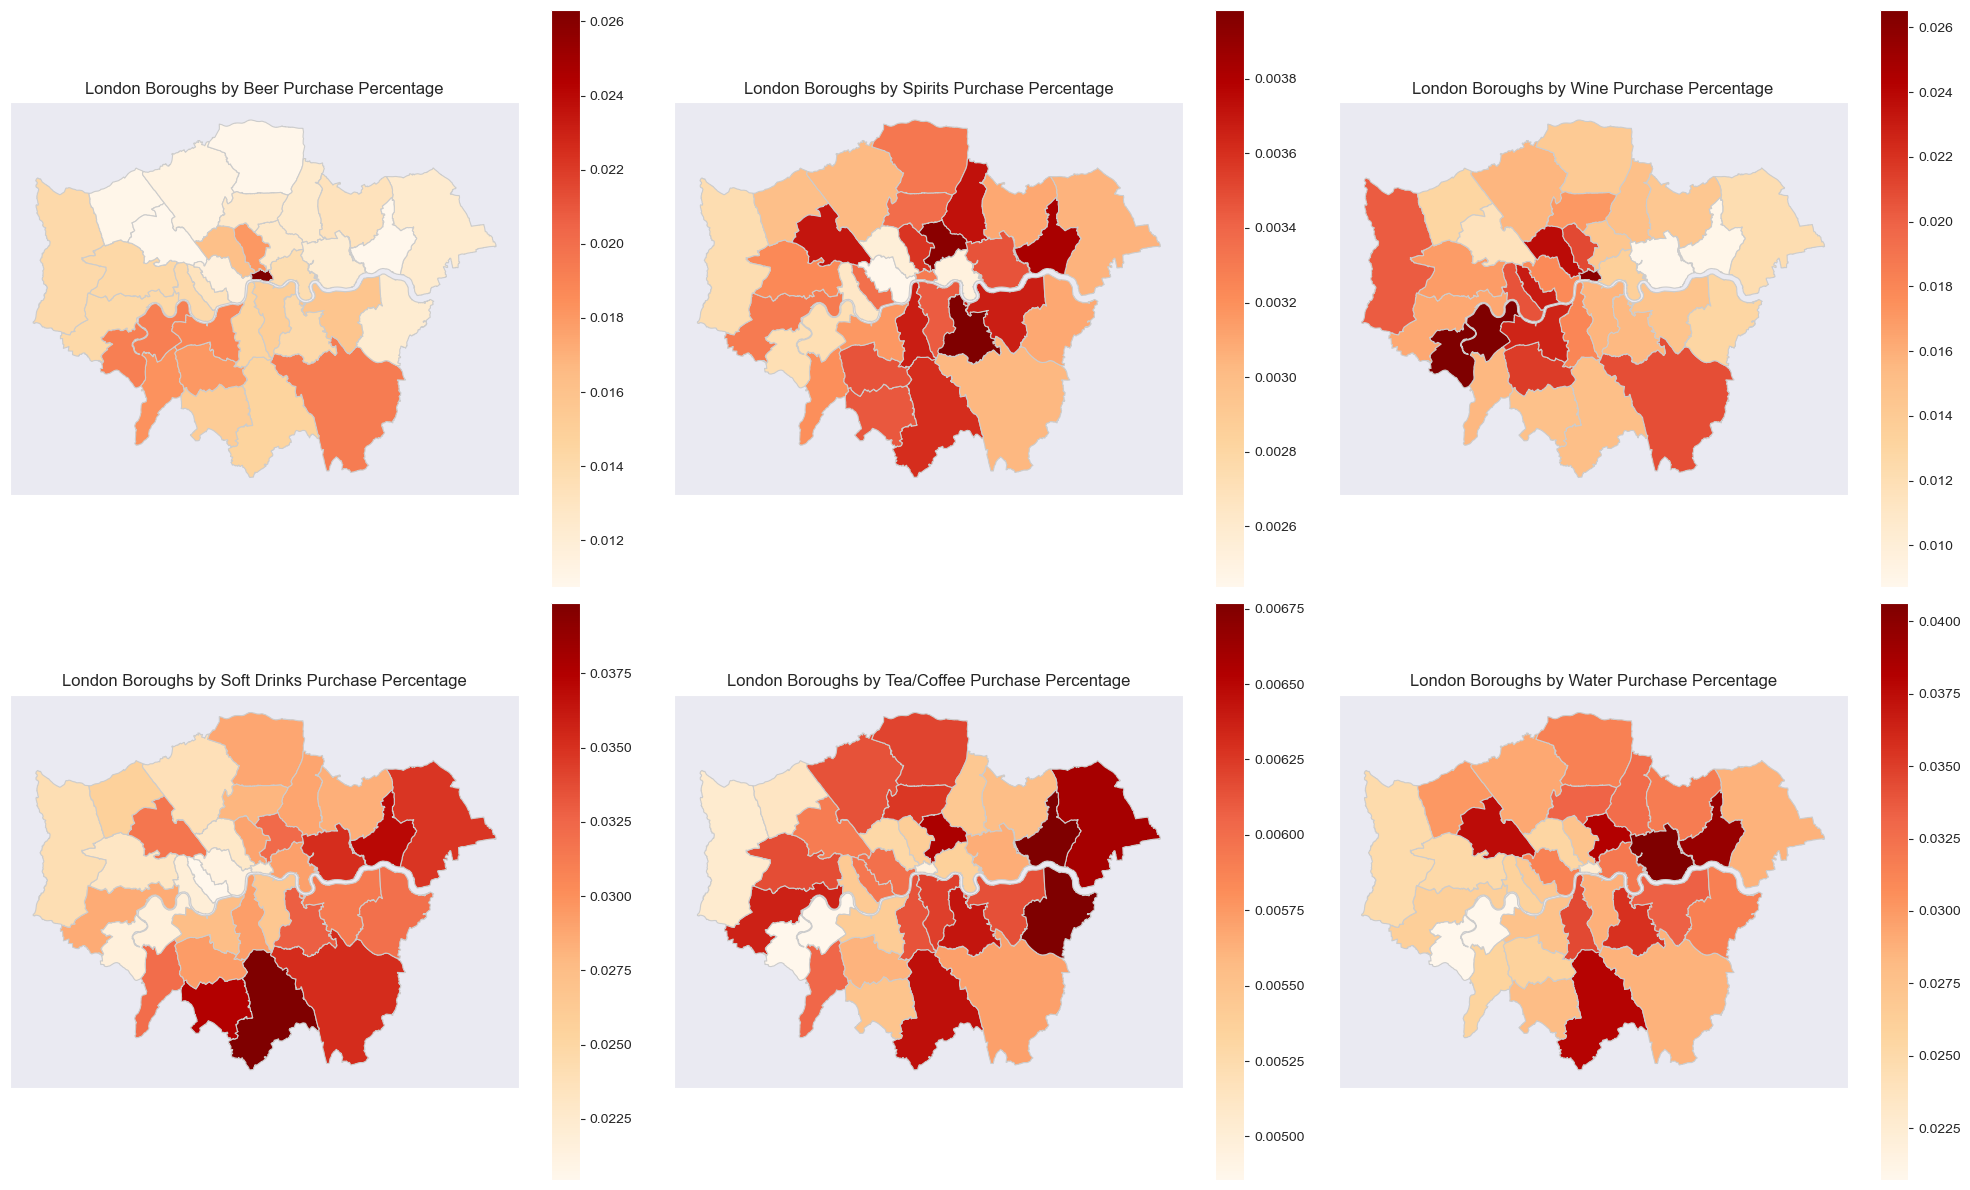

In [26]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Read the London boroughs shapefile
borough_shapes = gpd.read_file("london_boroughs_shapefile.dbf")
borough_shapes = borough_shapes.rename(columns={'GSS_CODE': 'area_id'})
borough_shapes = borough_shapes[['area_id', 'geometry']]

# Merge the borough shapes with the Tesco data using the index
merged_data = borough_shapes.merge(tesco_data[['area_id', '', 'f_beer', 'f_soft_drinks', 'f_spirits', 'f_tea_coffee', 'f_water', 'f_wine']], on='area_id')

# Create subplots
fig, axes = plt.subplots(2, 3, figsize=(20, 12))

# Plot for f_beer
merged_data.plot(column='f_beer', cmap='OrRd', linewidth=0.8, ax=axes[0, 0], edgecolor='0.8', legend=True)
axes[0, 0].set_title('London Boroughs by Beer Purchase Percentage')
axes[0, 0].set_xticks([])
axes[0, 0].set_yticks([])
axes[0, 0].set_xlabel('')
axes[0, 0].set_ylabel('')

# Plot for f_spirits
merged_data.plot(column='f_spirits', cmap='OrRd', linewidth=0.8, ax=axes[0, 1], edgecolor='0.8', legend=True)
axes[0, 1].set_title('London Boroughs by Spirits Purchase Percentage')
axes[0, 1].set_xticks([])
axes[0, 1].set_yticks([])
axes[0, 1].set_xlabel('')
axes[0, 1].set_ylabel('')

# Plot for f_wine
merged_data.plot(column='f_wine', cmap='OrRd', linewidth=0.8, ax=axes[0, 2], edgecolor='0.8', legend=True)
axes[0, 2].set_title('London Boroughs by Wine Purchase Percentage')
axes[0, 2].set_xticks([])
axes[0, 2].set_yticks([])
axes[0, 2].set_xlabel('')
axes[0, 2].set_ylabel('')

# Plot for f_soft_drinks
merged_data.plot(column='f_soft_drinks', cmap='OrRd', linewidth=0.8, ax=axes[1, 0], edgecolor='0.8', legend=True)
axes[1, 0].set_title('London Boroughs by Soft Drinks Purchase Percentage')
axes[1, 0].set_xticks([])
axes[1, 0].set_yticks([])
axes[1, 0].set_xlabel('')
axes[1, 0].set_ylabel('')

# Plot for f_tea_coffee
merged_data.plot(column='f_tea_coffee', cmap='OrRd', linewidth=0.8, ax=axes[1, 1], edgecolor='0.8', legend=True)
axes[1, 1].set_title('London Boroughs by Tea/Coffee Purchase Percentage')
axes[1, 1].set_xticks([])
axes[1, 1].set_yticks([])
axes[1, 1].set_xlabel('')
axes[1, 1].set_ylabel('')

# Plot for f_water
merged_data.plot(column='f_water', cmap='OrRd', linewidth=0.8, ax=axes[1, 2], edgecolor='0.8', legend=True)
axes[1, 2].set_title('London Boroughs by Water Purchase Percentage')
axes[1, 2].set_xticks([])
axes[1, 2].set_yticks([])
axes[1, 2].set_xlabel('')
axes[1, 2].set_ylabel('')

plt.tight_layout()
plt.show()

This visualisation does provide us with any conclusions, but we can infer that different boroughs have different spending habits with regards to drinks.

To investigate the average age data, I plot a histogram and view the summary statistics.

count    33.000000
mean     36.253457
std       2.498356
min      31.514726
25%      34.858641
50%      35.934276
75%      37.195582
max      43.910124
Name: avg_age, dtype: float64
Median: 35.93


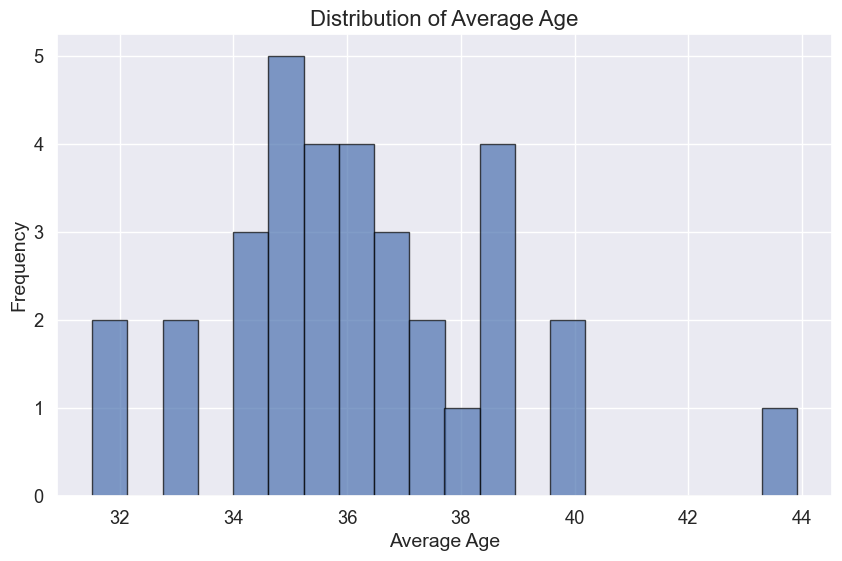

In [55]:
#  histogram of the 'avg_age' variable
plt.figure(figsize=(10, 6))
plt.hist(tesco_data['avg_age'], bins=20, edgecolor='black', alpha=0.7)
plt.xlabel('Average Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Average Age', fontsize=16)

print(tesco_data['avg_age'].describe())
print(f"Median: {np.median(tesco_data['avg_age']):.2f}")
plt.show()

I note one borough that seems to have a much older population compared to the other borough with an average age of 44. The median age is 35.93.

I next investigate the male and female demographic variables:

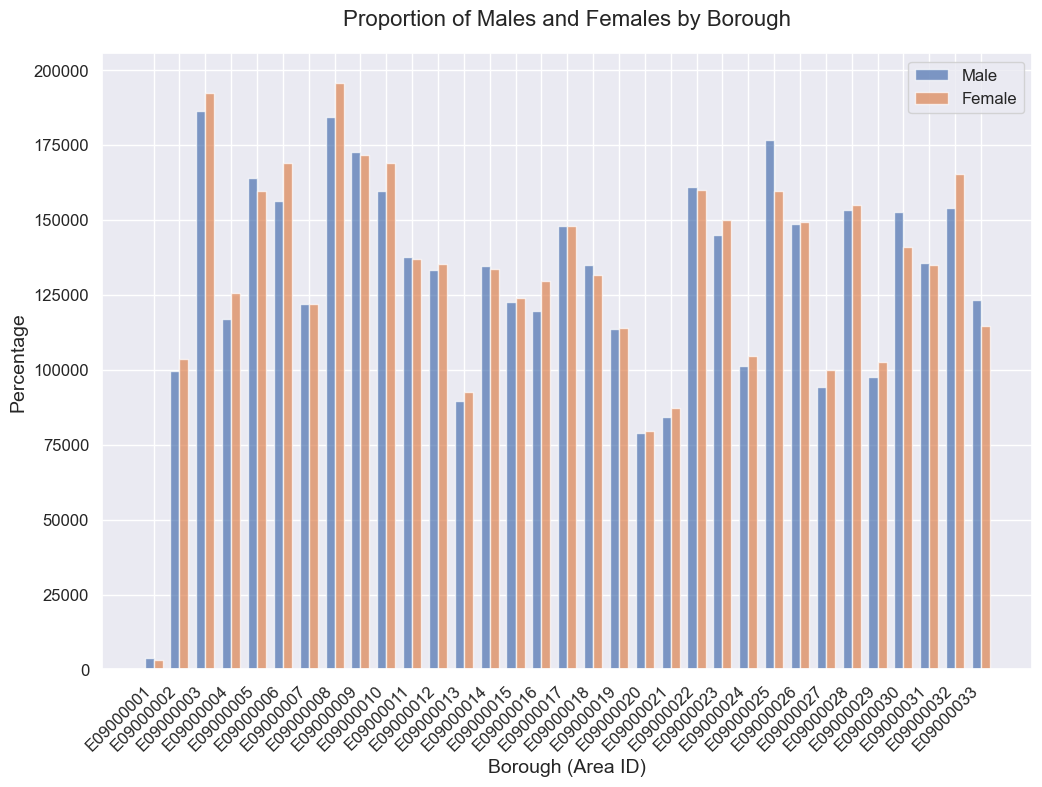

In [59]:
import matplotlib.pyplot as plt
import numpy as np

# Create a grouped bar chart
plt.figure(figsize=(12, 8))
area_ids = tesco_data['area_id'].unique()
x = np.arange(len(area_ids))
bar_width = 0.35
male_percentages = [tesco_data[tesco_data['area_id'] == area]['male'].values[0] for area in area_ids]
female_percentages = [tesco_data[tesco_data['area_id'] == area]['female'].values[0] for area in area_ids]

plt.bar(x - bar_width/2, male_percentages, width=bar_width, label='Male', alpha=0.7)
plt.bar(x + bar_width/2, female_percentages, width=bar_width, label='Female', alpha=0.7)

plt.xlabel('Borough (Area ID)', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.title('Proportion of Males and Females by Borough', fontsize=16, pad=20)
plt.xticks(x, area_ids, rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.show()

Upon looking at this variable, we note a similar ratio of males to females in each borough. Different boroughs are also noted to have varying populations.

I know investigate the relationships between the variables to gain insights.

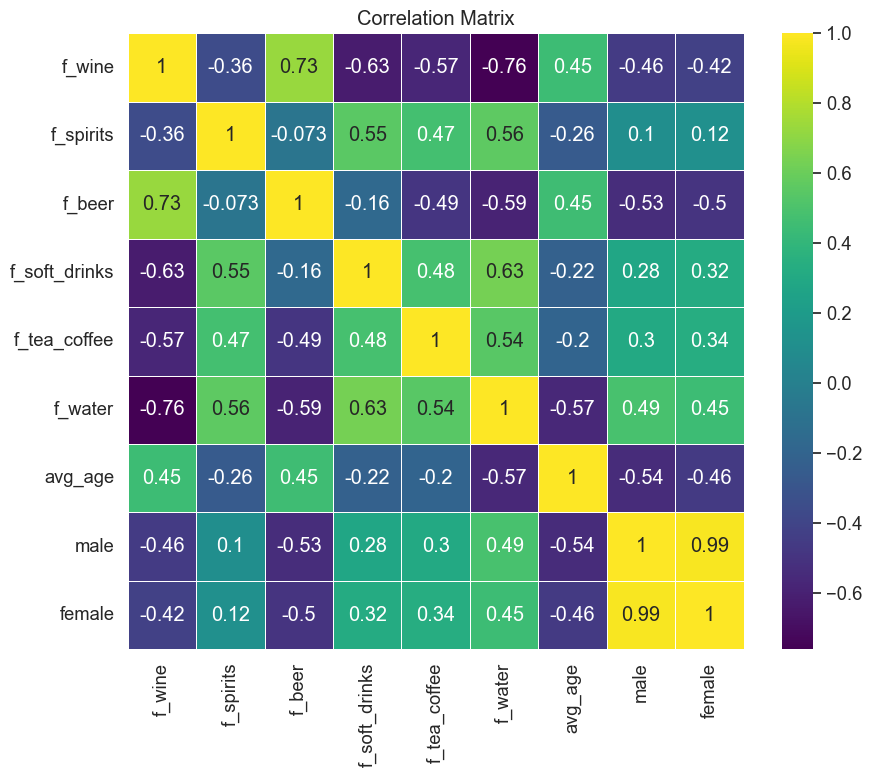

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

# desired variables for correlation analysis
vars_to_corr = ['f_wine', 'f_spirits', 'f_beer', 'f_soft_drinks', 'f_tea_coffee', 'f_water', 'avg_age', 'male', 'female']

# correlation matrix
corr_matrix = tesco_data[vars_to_corr].corr()

# heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', square=True, linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

The correlation matrix informs us how two variables are similar to one another. Values around 0 have little correlation, while values closer to 1 or -1 mean a strong positive or negative correlation, respectfully.



## Wine vs Water

The first insight we note the strongest negative correlation between water and wine. Meaning those who purchase wine, are less likely to purchase water too.

In [64]:
# Correlation analysis
corr_pearson, p_value_pearson = pearsonr(tesco_data['f_wine'], tesco_data['f_water'])

print(f"\nPearson correlation coefficient: {corr_pearson:.2f}")
print(f"Pearson correlation p-value: {p_value_pearson:.4f}")


Pearson correlation coefficient: -0.76
Pearson correlation p-value: 0.0000


In [ ]:
# Scatterplot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(data=tesco_data, x='f_wine', y='f_water', color='darkblue', line_kws={'color': 'red'})
plt.title('Wine Purchase Percentage vs. Water Purchase Percentage')
plt.xlabel('Fraction of Wine Purchased')
plt.ylabel('Fraction of Water Purchased')
plt.show()

## Wine vs Beer

We also note that the strongest positive correlation is that of beer and wine, meaning those who purchase wine are also likely to purchase beer.

In [66]:
# Correlation analysis
corr_pearson, p_value_pearson = pearsonr(tesco_data['f_wine'], tesco_data['f_beer'])

print(f"\nPearson correlation coefficient: {corr_pearson:.2f}")
print(f"Pearson correlation p-value: {p_value_pearson:.4f}")


Pearson correlation coefficient: 0.73
Pearson correlation p-value: 0.0000


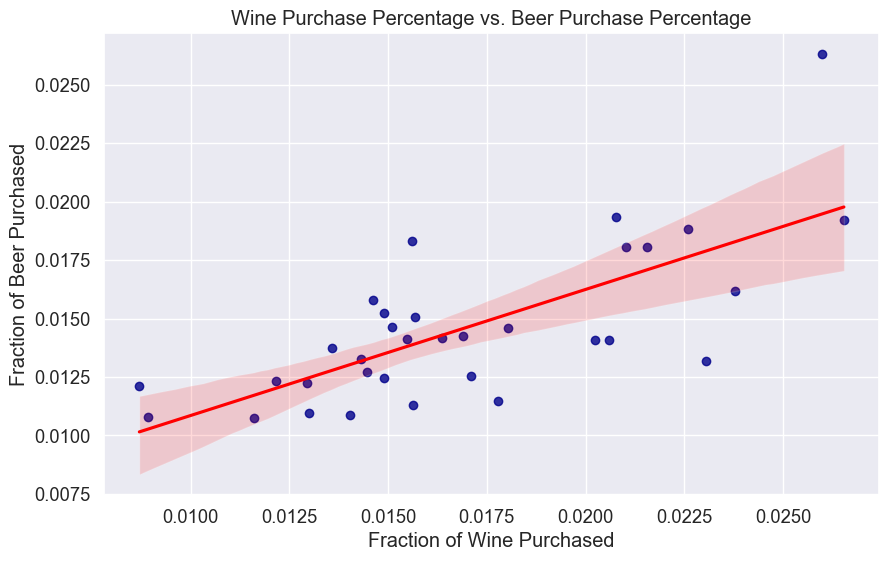

In [67]:
# Scatterplot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(data=tesco_data, x='f_wine', y='f_beer', color='darkblue', line_kws={'color': 'red'})
plt.title('Wine Purchase Percentage vs. Beer Purchase Percentage')
plt.xlabel('Fraction of Wine Purchased')
plt.ylabel('Fraction of Beer Purchased')
plt.show()

Interpretation:

Conclude that the best comparisons to understand purchase behaviour would be comparing spirits purchases vs wine purches

Insight 1: There is a negative correlation between wine and spirits been purchased. This suggests that these could be substitute goods and people in the area would usually purchase one of the other.
Insight 2: Beer is often purchased along with wine, but not along with spirits. We could not infer any sort of correlation between spirits and beer.

### Task 3: Combing Datasets

The next of the analysis incorporates data from income data from each borough. The data is sources from the government datastore of average income of tax payers, by borough. I only input the 2015 data as this was the same year that the Tesco data was collected. Once again we must be aware of the assumptions and limitations. We make additional assumptions upon those that were stated earlier.

- As we assume the tesco data is representive of the entire population, we assume that the tax payers income is represents the income for the whole borough. And in turn, the income of the tesco consumer.
- The limitation is that not all clubcard owners may be tax payers.
- Income reporting bias where individuals may misreport their income for tax evasion.
- Previously mentioned assumptions, limitations and biases still apply.

Again we start with some initial analysis on our new data.

In [12]:
# read excel as pandas
earnings = pd.read_excel("income-of-tax-payers.xlsx", sheet_name="Total Income", usecols="A, B, AV, AW, AX", header=1)[:35]
earnings = earnings.dropna()
earnings.columns = ["area_id", "Area", "Individuals", "Mean", "Median"]

# test to view
print(earnings.head(5))
print(earnings.describe())

     area_id                  Area  Individuals      Mean   Median
1  E09000001        City of London      10000.0  142000.0  60000.0
2  E09000002  Barking and Dagenham      83000.0   25900.0  22100.0
3  E09000003                Barnet     178000.0   49000.0  27700.0
4  E09000004                Bexley     127000.0   30900.0  24500.0
5  E09000005                 Brent     154000.0   32600.0  23200.0
         Individuals           Mean        Median
count      33.000000      33.000000     33.000000
mean   125333.333333   52006.060606  29003.030303
std     34988.986362   33150.762995   6917.481697
min     10000.000000   25900.000000  22100.000000
25%    105000.000000   34500.000000  25600.000000
50%    130000.000000   40200.000000  27100.000000
75%    144000.000000   50800.000000  30300.000000
max    178000.000000  178000.000000  60000.000000


We note 33 boroughs once again, a mean income and a median income. Similar to before, I view the income by borough through the means of a map, with a heat scale showing the income. Again, a geographic map is useful as we should see a trend of wealthy and poorer areas.

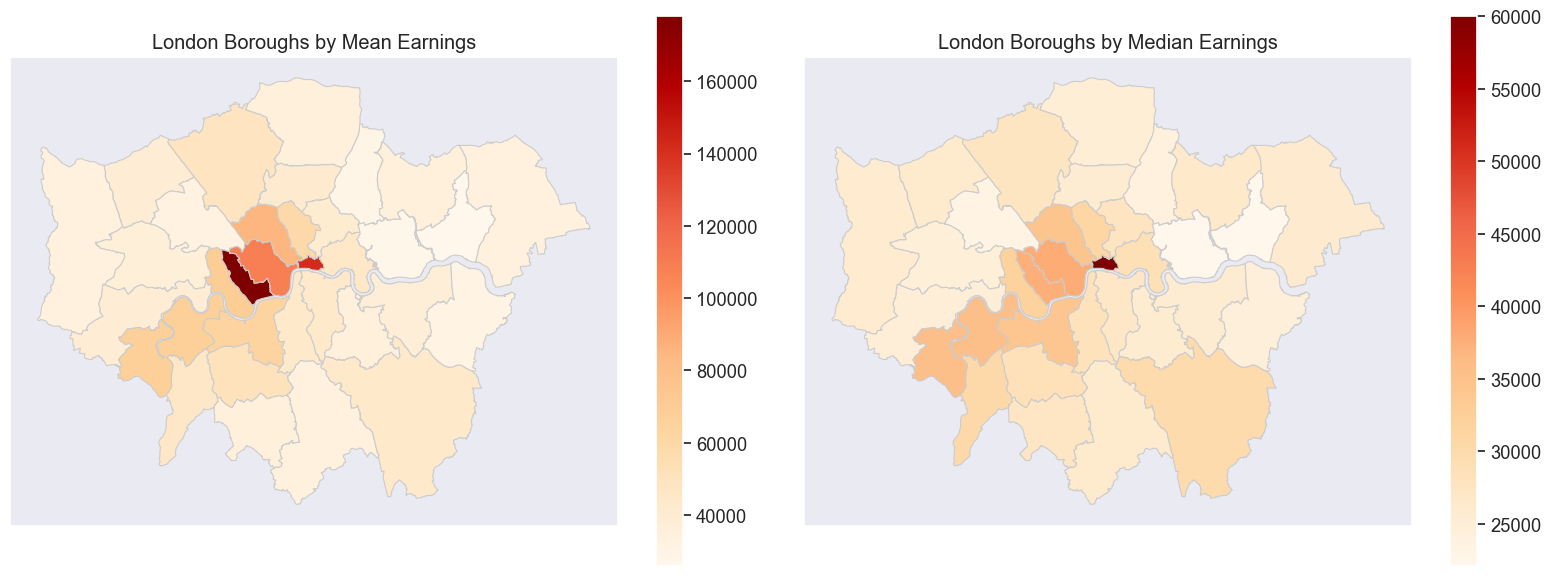

In [70]:
# Merge the borough shapes with earnings data using 'area_id'
merged_income = merged_data.merge(earnings[['area_id', 'Area', 'Mean', 'Median']], on='area_id')

# Create subplot
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot for Mean earnings
merged_income.plot(column='Mean', cmap='OrRd', linewidth=0.8, ax=axes[0], edgecolor='0.8', legend=True)
axes[0].set_title('London Boroughs by Mean Earnings')
axes[0].set_xticks([])
axes[0].set_yticks([])
axes[0].set_xlabel('')
axes[0].set_ylabel('')

# Plot for Median earnings
merged_income.plot(column='Median', cmap='OrRd', linewidth=0.8, ax=axes[1], edgecolor='0.8', legend=True)
axes[1].set_title('London Boroughs by Median Earnings')
axes[1].set_xticks([])
axes[1].set_yticks([])
axes[1].set_xlabel('')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

One can note how the intensity of income is concentrated in central London, with less wealthy areas on the outside. The difference between median and mean income is interesting as we note different boroughs are the noted as the wealthiest. This suggests skewness in the data, where the areas with a stronger mean value will contain more extreme wealth, while the areas with a stronger median will have greater general wealth. Therefore, for the remainder of the analysis, the median wealth will be used as it better demonstrates the overall borough.

Index(['area_id', 'geometry', 'f_beer', 'f_soft_drinks', 'f_spirits',
       'f_tea_coffee', 'f_water', 'f_wine', 'Mean', 'Median'],
      dtype='object')


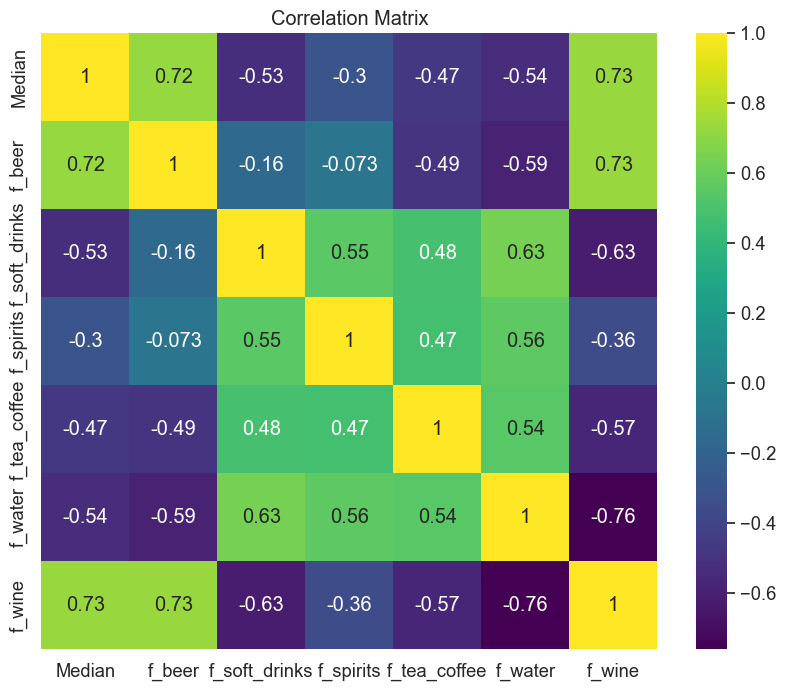

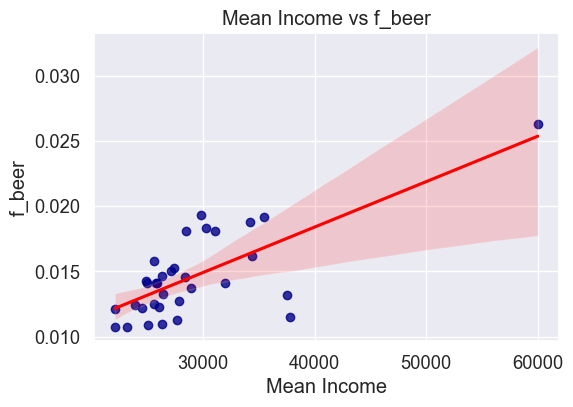

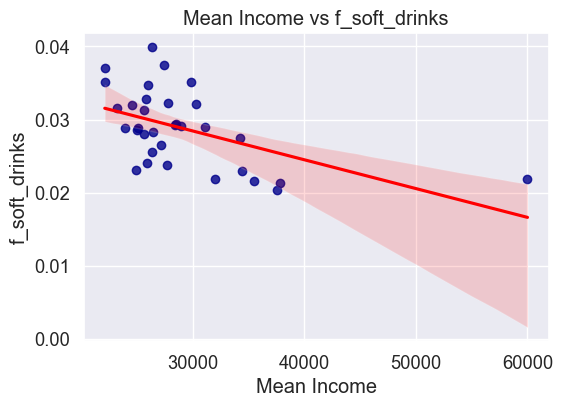

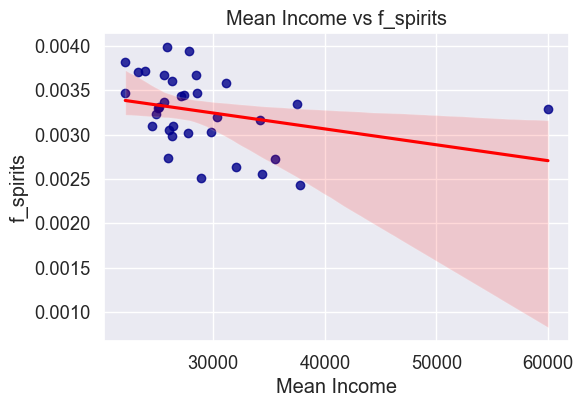

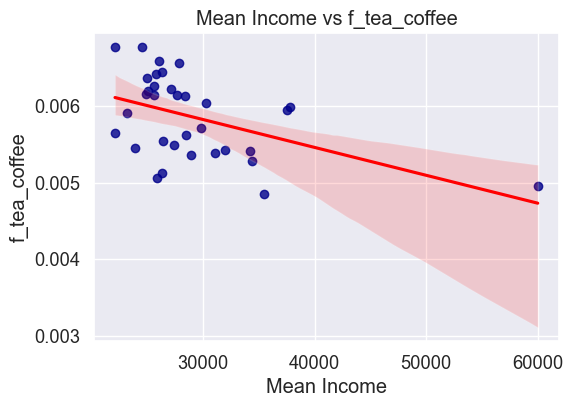

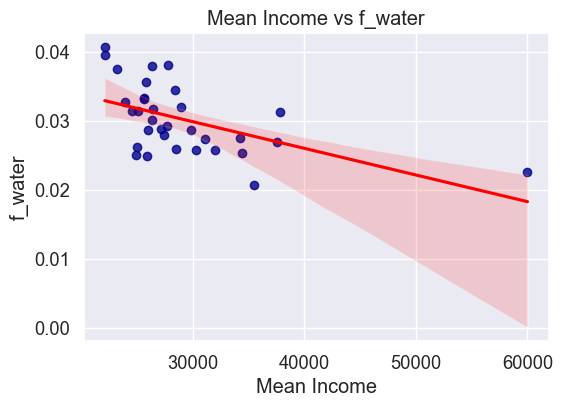

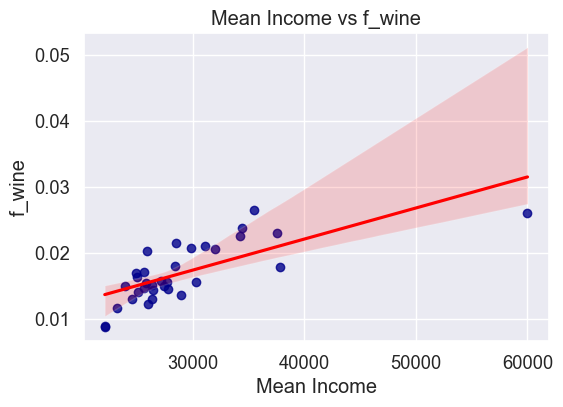

Regression Results for f_beer:
                            OLS Regression Results                            
Dep. Variable:                 f_beer   R-squared:                       0.525
Model:                            OLS   Adj. R-squared:                  0.509
Method:                 Least Squares   F-statistic:                     34.22
Date:                Tue, 16 Apr 2024   Prob (F-statistic):           1.88e-06
Time:                        17:18:43   Log-Likelihood:                 154.29
No. Observations:                  33   AIC:                            -304.6
Df Residuals:                      31   BIC:                            -301.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0045

In [76]:
from statsmodels.formula.api import ols

# Calculate the correlation matrix
corr_matrix = merged_income[['Median', 'f_beer', 'f_soft_drinks', 'f_spirits', 'f_tea_coffee', 'f_water', 'f_wine']].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', square=True)
plt.title('Correlation Matrix')
plt.show()

# Create scatter plots
variables = ['f_beer', 'f_soft_drinks', 'f_spirits', 'f_tea_coffee', 'f_water', 'f_wine']
for var in variables:
    plt.figure(figsize=(6, 4))
    plt.scatter(merged_income['Median'], merged_income[var], alpha=0.7)
    #sns.regplot(data=merged_income, x='Median', y=merged_income[var], color='darkblue', line_kws={'color': 'red'})
    plt.xlabel('Mean Income')
    plt.ylabel(var)
    plt.title(f'Mean Income vs {var}')
    plt.show()

# Perform linear regression analysis
for var in variables:
    model = ols(f'{var} ~ Median', data=merged_income).fit()
    print(f"Regression Results for {var}:")
    print(model.summary())
    print("\n")

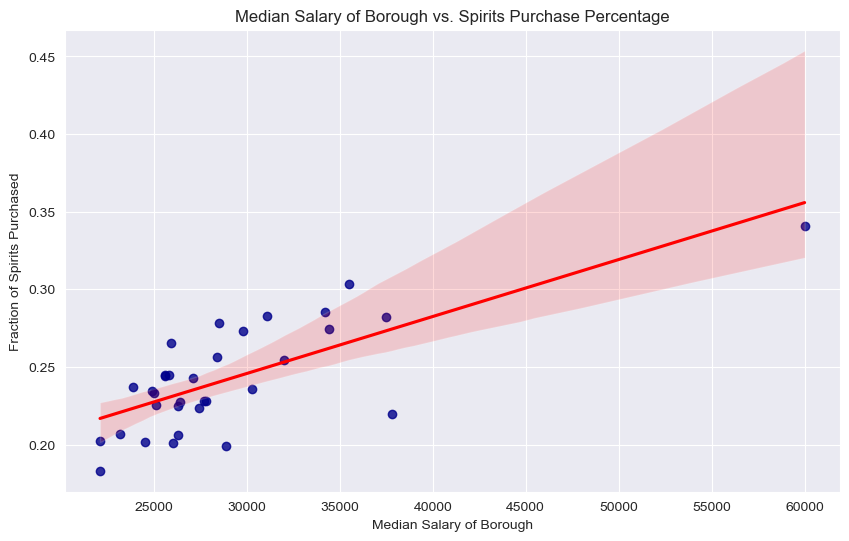

In [17]:
# Scatterplot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(data=merged_income, x='Median', y='alcohol', color='darkblue', line_kws={'color': 'red'})
plt.title('Median Salary of Borough vs. Spirits Purchase Percentage')
plt.xlabel('Median Salary of Borough')
plt.ylabel('Fraction of Spirits Purchased')
plt.show()

## Cluster Analysis

/Users/graham/tensorflow-test/env/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/graham/tensorflow-test/env/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/graham/tensorflow-test/env/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/graham/tensorflow-test/env/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The defa

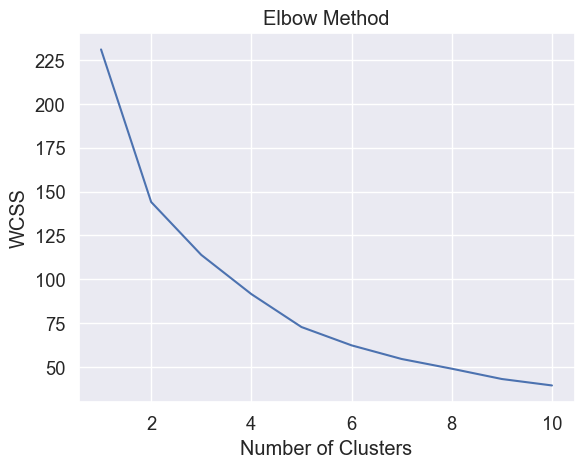

Cluster 0:
Boroughs:


/Users/graham/tensorflow-test/env/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KeyError: 'Area'

In [81]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Select relevant variables for clustering
variables = ['Median', 'f_beer', 'f_soft_drinks', 'f_spirits', 'f_tea_coffee', 'f_water', 'f_wine']
X = merged_income[variables]

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Choose the optimal number of clusters based on the Elbow Method plot
n_clusters = 2  # Adjust based on your interpretation of the plot

# Perform K-means clustering
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

# Add cluster labels to the data
merged_income['Cluster'] = cluster_labels

# Analyze and interpret the clusters
for i in range(n_clusters):
    cluster_data = merged_income[merged_income['Cluster'] == i]
    print(f"Cluster {i}:")
    print("Boroughs:")
    print(cluster_data['Area'].tolist())
    print("\nMedian Income and Shopping Behavior:")
    print(cluster_data[variables].median())
    print("\n")

# Visualize the clusters
plt.figure(figsize=(8, 6))
for i in range(n_clusters):
    cluster_data = merged_income[merged_income['Cluster'] == i]
    plt.scatter(cluster_data['Median'], cluster_data['f_beer'], label=f'Cluster {i}')
plt.xlabel('Median Income')
plt.ylabel('Beer Purchases')
plt.legend()
plt.show()

### Task 4: Presentation

### Task 5: Executive Summary

### References

https://www.statista.com/topics/3807/tesco-plc/#editorsPicks

https://data.london.gov.uk/dataset/average-income-tax-payers-borough